<a href="https://colab.research.google.com/github/Joanachoong/Externship/blob/main/YouTube__filter_keyword.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd

from google.colab import drive
data = pd.read_csv('youtube_cleaned_text-2.csv')

In [35]:
from collections import Counter
import pandas as pd

# Filter out non-string and null values from 'cleaned_advice'
valid_advice = [item for item in data['transcript_cleanedV2'] if pd.notna(item) and isinstance(item, str)]

# Join all valid cleaned reviews into one big string, then split into words
all_words = ' '.join(valid_advice).split()

# Count frequency of each word
word_counts = Counter(all_words)

print(word_counts.most_common(5))

[('amazon', 198), ('get', 113), ('one', 98), ('going', 83), ('go', 77)]


 Want to filter, sort, or export? Turn it into a DataFrame:


In [36]:
import pandas as pd

word_df = pd.DataFrame(word_counts.items(), columns=['word', 'count']).sort_values(by='count', ascending=False)

Create a Bar Chart of Top Keywords (Unigrams)


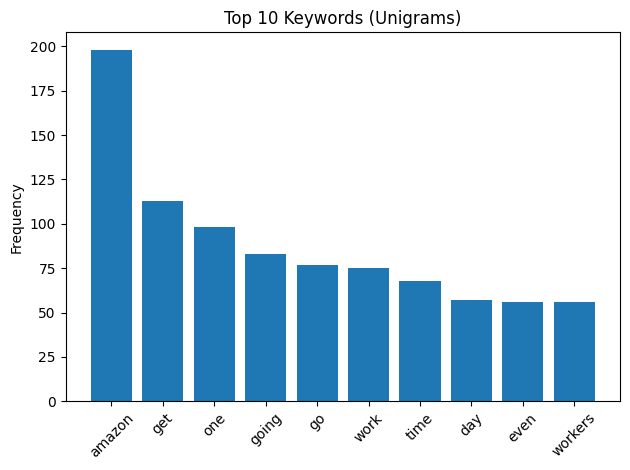

In [37]:
import matplotlib.pyplot as plt

most_common = word_counts.most_common(10)
words, counts = zip(*most_common)

plt.bar(words, counts)
plt.title("Top 10 Keywords (Unigrams)")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

work” or “team” are cluttering your chart, filter them out like this:


In [38]:
stop_keywords = ['team','company', 'job', 'work','amazon']
filtered_words = [word for word in all_words if word not in stop_keywords]
filtered_counts = Counter(filtered_words)

Generate Bigrams and Trigrams


In [39]:
from nltk.util import ngrams

bigrams = list(ngrams(all_words, 2))
trigrams = list(ngrams(all_words, 3))

bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

print(bigram_counts.most_common(3))


[(('amazon', 'warehouse'), 17), (('first', 'day'), 17), (('conveyor', 'belt'), 16)]


Visualize Bigrams and Trigrams


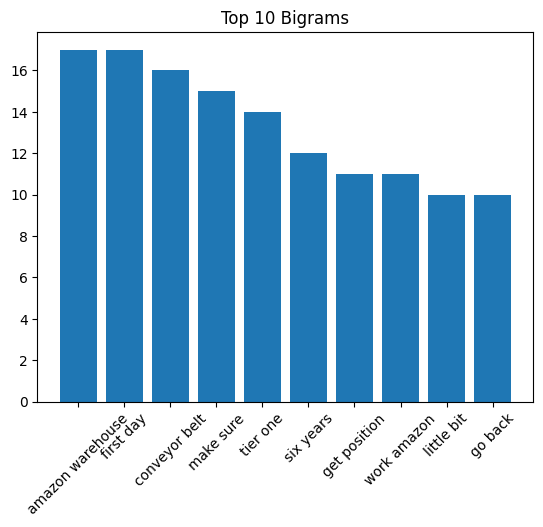

In [40]:
# For bigrams
common_bigrams = bigram_counts.most_common(10)
bg_labels = [' '.join(bg) for bg, count in common_bigrams]
bg_counts = [count for bg, count in common_bigrams]

plt.bar(bg_labels, bg_counts)
plt.title("Top 10 Bigrams")
plt.xticks(rotation=45)
plt.show()


### Generate a Word Cloud

a visual collage where the most frequent words appear the largest.

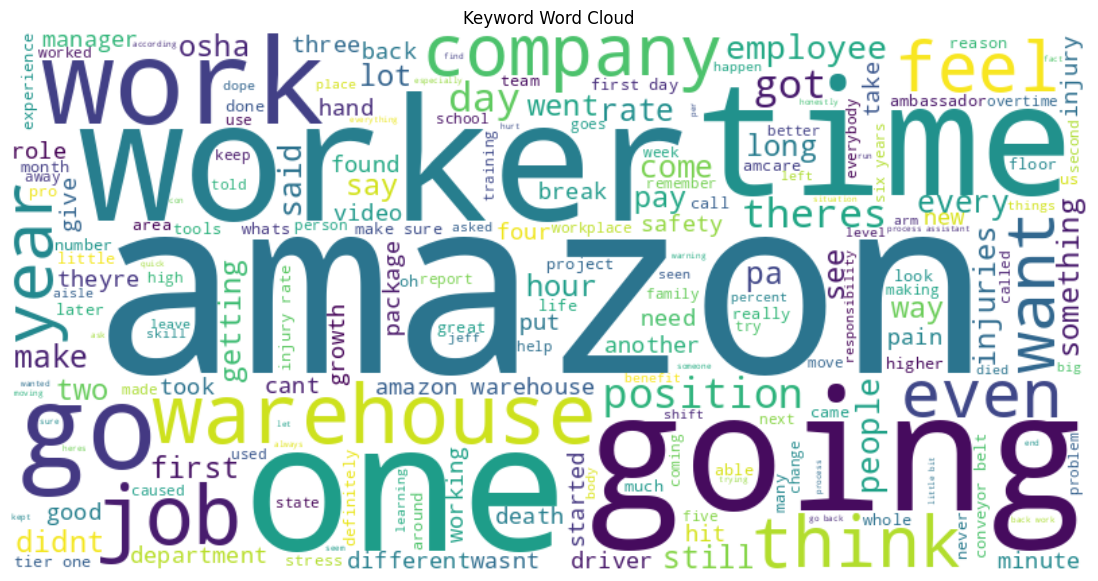

In [41]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Keyword Word Cloud")
plt.show()